## Get Node Data
Data source: 'https://drexel0-my.sharepoint.com/:f:/r/personal/sr3563_drexel_edu/Documents/Social_NLP_Lab/Datasets/Reddit%20Drug%20Data-%20RAW%20-%20DNT/Central/data%20Dec%201st%202022?csf=1&web=1&e=Wa9obk" 

`Datasets > Central > data Dec 1st 2022`

Data Selection:  
1. Top Drug subreddit in each class  
  a. Depressants: r/benzodiazipines 
  b. Hallucinogens: r/lsd
  c. Narcotics (Opioids): r/opiates
  d. Stimulants: r/cocaine
  e. Cannabis: r/trees
2. Get all users who have made at least 2 posts in the subreddit during the year june 2021-june 2022


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
# do not print warnings
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

---

WITH dATA FROM ONEDRIVE

Missing author username - just author id which cannot be passed to submission API

In [34]:
# get posts from the june 2021-june 2022

# path = "/Users/laylabouzoubaa/Library/CloudStorage/OneDrive-DrexelUniversity/Social_NLP_Lab/Datasets/Reddit Drug Data- RAW - DNT/Central/data Dec 1st 2022/data 2018_1_1 to 2022_7_30_"
# subs = ["LSD", "benzodiazepines", "cocaine", "opiates"]
# bot_patterns = ["-bot", "AutoModerator", "Bot", "BOT", "B0T", "b0t", "b0T", "bOt", "_bot"]


# def make_drug_df(sub):
#     df = pd.read_json(path + sub + "_submission.json", lines=True)
#     df = pd.DataFrame(df[1][0])
#     users = pd.read_json(path + sub + "_redditor.json", lines=True)
#     users = pd.DataFrame(users[1][0])
#     # join name by id
#     df = df.merge(users[["id", "name", "post_karma"]], left_on="author", right_on="id")
#     # convert created at to datetime
#     df["created_utc"] = pd.to_datetime(df["created_utc"],  unit='s')
#     # filter by date >= july 1 2021
#     df = df[df["created_utc"] >= "2021-07-01"]

#     # filter out bots
#     df = df[~df["name"].str.contains('|'.join(bot_patterns))]

#     # filter users that have negative post karma
#     df = df[df["post_karma"] >= 0]

#     return df

In [35]:
# opiates = make_drug_df("opiates")
# LSD = make_drug_df("LSD")
# cocaine = make_drug_df("cocaine")
# benzodiazepines = make_drug_df("benzodiazepines")

Potential bot detection:

In [36]:
# remove posts that were removed
# opiates= opiates[opiates["text"] != "[removed]"]
# LSD= LSD[LSD["text"] != "[removed]"]
# cocaine= cocaine[cocaine["text"] != "[removed]"]
# benzodiazepines= benzodiazepines[benzodiazepines["text"] != "[removed]"]

<AxesSubplot:>

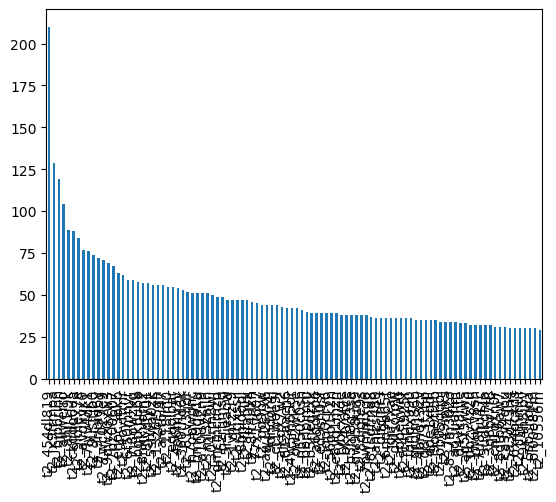

In [12]:
# look at frequency of posts per user
# cocaine["author"].value_counts().sort_values(ascending=False).head(100).plot(kind="bar")

In [37]:
# mean posts
# opiates["author"].value_counts().mean()

1.0

In [38]:
# filter out users with less than 10 posts
# opiates2 = opiates.groupby("author").filter(lambda x: len(x) >= 10)
# LSD2 = LSD.groupby("author").filter(lambda x: len(x) >= 10)
# cocaine2 = cocaine.groupby("author").filter(lambda x: len(x) >= 10)
# benzodiazepines2 = benzodiazepines.groupby("author").filter(lambda x: len(x) >= 10)

In [43]:
# print("mean number of posts per user opiates: ", opiates2["author"].value_counts().mean())
# print("mean number of posts per user cocaine: ", cocaine2["author"].value_counts().mean())
# print("mean number of posts per user benzo: ", benzodiazepines2["author"].value_counts().mean())
# print("mean number of posts per user LSD: ", LSD2["author"].value_counts().mean())

mean number of posts per user opiates:  16.44776119402985
mean number of posts per user cocaine:  20.838658146964857
mean number of posts per user benzo:  15.324675324675324
mean number of posts per user LSD:  17.5761316872428


In [44]:
# print("max number of posts per user opiates: ", opiates2["author"].value_counts().max())
# print("max number of posts per user cocaine: ", cocaine2["author"].value_counts().max())
# print("max number of posts per user benzo: ", benzodiazepines2["author"].value_counts().max())
# print("max number of posts per user LSD: ", LSD2["author"].value_counts().max())

max number of posts per user opiates:  54
max number of posts per user cocaine:  210
max number of posts per user benzo:  86
max number of posts per user LSD:  130


In [15]:
# get list of unique user ids
# opiates_users = opiates2["name"].unique()
# LSD_users = LSD2["name"].unique()
# cocaine_users = cocaine2["name"].unique()
# benzodiazepines_users = benzodiazepines2["name"].unique()

In [23]:
# total number of users
# len(opiates_users) + len(LSD_users) + len(cocaine_users) + len(benzodiazepines_users)

1090

In [26]:
# save as json
# write each user list to json
# with open('data/opiates_users.json', 'w') as f:
#     json.dump(opiates_users.tolist(), f)
# with open('data/LSD_users.json', 'w') as f:
#     json.dump(LSD_users.tolist(), f)
# with open('data/cocaine_users.json', 'w') as f:
#     json.dump(cocaine_users.tolist(), f)
# with open('data/benzodiazepines_users.json', 'w') as f:
#     json.dump(benzodiazepines_users.tolist(), f)

Get user data based on id

In [17]:
# run all_users to py/get_user_subreddit.py
# IN THE TERMINAL

In [1]:
# get the count of each subreddit within the subreddit column
def get_sub_count(df):
    # users with empty subreddit did not post in any subreddit
    df = df[df["subreddit"].map(len) > 0]
    df["engaged_subs"] = ""
    for row in df.iterrows():
        counter = 0
        engaged_subs = []
        for sub in row[1]["subreddit"]:
            # count each distinct subreddit
            counter += 1
            if counter >= 10:
                engaged_subs.append(sub)
        df.at[row[0], "engaged_subs"] = list(set(engaged_subs))
    return df

In [3]:
# read in users per subreddit
path = './data/user_subs/2023-04-20'
subs = ["LSD", "benzodiazepines", "cocaine", "opiates"]
for sub in subs:
    df = pd.read_json(path + "/user_subreddits_0_" + sub + ".json", lines=True)
    df = df.T.reset_index().rename(columns={"index": "name", 0: "subreddit"})
    df = get_sub_count(df)
    df = df[["name", "engaged_subs"]]
    # store as df in env
    exec(sub + "_clean = df")

In [4]:
cocaine_clean = cocaine_clean.explode("engaged_subs").reset_index(drop=True)
LSD_clean = LSD_clean.explode("engaged_subs").reset_index(drop=True)
benzodiazepines_clean = benzodiazepines_clean.explode("engaged_subs"). reset_index(drop=True)
opiates_clean = opiates_clean.explode("engaged_subs").reset_index(drop=True)

---

MAKE NETWORKS

In [5]:
# convert to func
def make_edge_df(df):
    # left outer join on itself
    df2 = pd.merge(df, df, left_on= "name", right_on = "name", how = "left")
    df2 = df2.groupby(["engaged_subs_x", "engaged_subs_y"]).size().reset_index(name="weight")
    df2 = df2[df2["engaged_subs_x"] != df2["engaged_subs_y"]]
    df2 = df2.sort_values(by = "weight", ascending = False)
    return df2

In [6]:
cocaine2 = make_edge_df(cocaine_clean)
LSD2 = make_edge_df(LSD_clean)
benzodiazepines2 = make_edge_df(benzodiazepines_clean)
opiates2 = make_edge_df(opiates_clean)

In [7]:
# subset by index 
cocaine2 = cocaine2[::2]
LSD2 = LSD2[::2]
benzodiazepines2 = benzodiazepines2[::2]
opiates2 = opiates2[::2]

In [8]:
# rename cols
cocaine2 = cocaine2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
LSD2 = LSD2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
benzodiazepines2 = benzodiazepines2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})
opiates2 = opiates2.rename(columns = {"engaged_subs_x": "source", "engaged_subs_y": "target"})

In [32]:
# export to csv

# cocaine2.to_csv("data/cocaine_clean.csv", index=False)
# LSD2.to_csv("data/LSD_clean.csv", index=False)
# benzodiazepines2.to_csv("data/benzodiazepines_clean.csv", index=False)
# opiates2.to_csv("data/opiates_clean.csv", index=False)

---

NETWORK ANALYSIS

In [9]:
import networkx as nx

In [43]:
# turn into function
def get_centrality(df, avg_deg):
    G = nx.from_pandas_edgelist(df, source="source", target="target", edge_attr="weight")
    # filter nodes less than avg
    rem = []
    for node in G.nodes():
        if G.degree(node) < avg_deg:
            rem.append(node)
    G.remove_nodes_from(rem)
    degree = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
    return G, degree, betweenness, closeness, eigenvector

In [36]:
def get_degree(dict, G):
    df = pd.DataFrame.from_dict(dict, orient='index').reset_index()
    # hist
    degrees = [G.degree(n, weight='weight') for n in G.nodes()]
    plt.hist(degrees)
    # loglog
    degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
    plt.loglog(degree_sequence,marker='*')
    plt.show()
    # most influential nodes
    for node in sorted(dict, key=dict.get, reverse=True):
        print(node, dict[node])
    return df

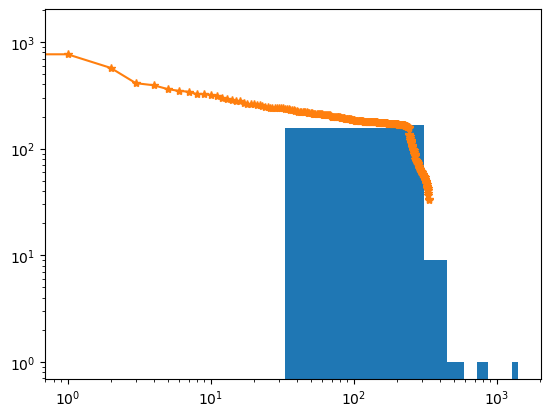

cocaine 0.7634730538922156
Drugs 0.7305389221556887
Showerthoughts 0.7155688622754491
AskReddit 0.7005988023952097
depression 0.7005988023952097
unpopularopinion 0.7005988023952097
Anxiety 0.6916167664670659
memes 0.688622754491018
Dreams 0.6766467065868264
HelpMeFind 0.6706586826347306
confession 0.658682634730539
itookapicture 0.655688622754491
identifythisfont 0.6467065868263473
pics 0.6467065868263473
sex 0.6407185628742516
NoStupidQuestions 0.625748502994012
relationships 0.6047904191616766
LiminalSpace 0.6047904191616766
StackAdvice 0.5988023952095809
streetwear 0.595808383233533
UnethicalLifeProTips 0.595808383233533
cats 0.592814371257485
confessions 0.5898203592814372
SkincareAddicts 0.5898203592814372
findareddit 0.5898203592814372
MarkMyWords 0.5898203592814372
OutOfTheLoop 0.5838323353293413
LifeProTips 0.5778443113772456
explainlikeimfive 0.5748502994011977
running 0.5748502994011977
Piracy 0.5748502994011977
whatisthisthing 0.5718562874251497
changemyview 0.56886227544910

In [44]:
# cocaine
G_C, cocaine_degree, cocaine_betweenness, cocaine_closeness, cocaine_eigenvector = get_centrality(cocaine2, 126.2)
cocaine_degree_df = get_degree(cocaine_degree, G_C)

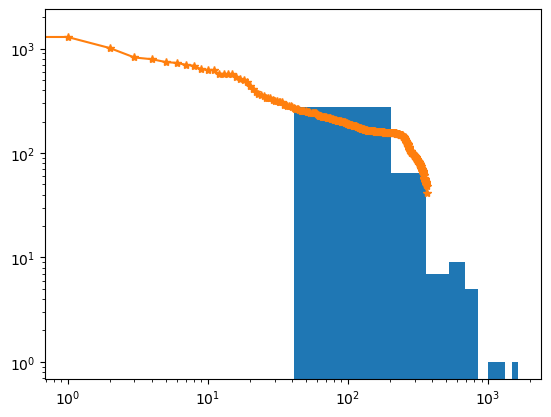

benzodiazepines 0.7753424657534247
opiates 0.7561643835616438
Drugs 0.7479452054794521
cocaine 0.7479452054794521
benzorecovery 0.736986301369863
weed 0.7287671232876712
pillhead 0.726027397260274
LSD 0.7205479452054795
antidepressants 0.7205479452054795
AskReddit 0.7068493150684931
depression 0.7041095890410959
researchchemicals 0.6931506849315069
dxm 0.6931506849315069
trees 0.6876712328767123
gabagoodness 0.6821917808219178
Stims 0.6575342465753424
Psychedelics 0.6575342465753424
drugsarebeautiful 0.6493150684931507
MDMA 0.6438356164383562
askdrugs 0.6438356164383562
unpopularopinion 0.6356164383561644
Dihydrocodeine 0.6328767123287671
ObscureDrugs 0.6164383561643836
shrooms 0.6054794520547945
pregabalin 0.5917808219178082
DMT 0.5863013698630137
drugscirclejerk 0.5808219178082192
alcoholism 0.5780821917808219
funny 0.5753424657534246
cripplingalcoholism 0.5753424657534246
dissociatives 0.5698630136986301
WTF 0.5698630136986301
Salvia 0.5671232876712329
woahdude 0.5643835616438356
Ps

In [45]:
G_B, benzodiazepines_degree, benzodiazepines_betweenness, benzodiazepines_closeness, benzodiazepines_eigenvector = get_centrality(benzodiazepines2, 136.3)
benzodiazepines_degree_df = get_degree(benzodiazepines_degree, G_B)

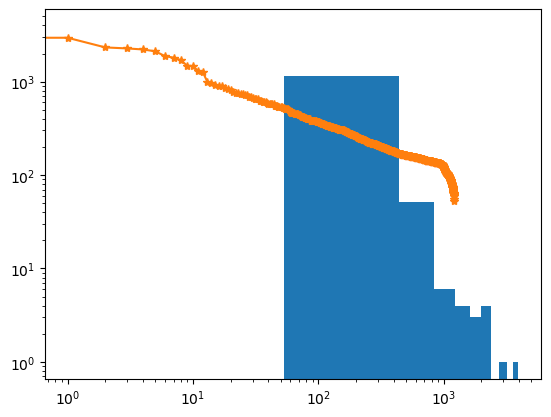

LSD 0.7817427385892116
shrooms 0.75850622406639
Psychonaut 0.737759336099585
DMT 0.7029045643153526
Psychedelics 0.6921161825726141
weed 0.6672199170124481
trees 0.6597510373443983
Acid 0.6157676348547718
trippy 0.5518672199170125
Drugs 0.5485477178423236
psychedelicartwork 0.5278008298755187
AskReddit 0.5161825726141078
NitrousOxide 0.5053941908713693
MDMA 0.45062240663900416
funny 0.44481327800829873
pics 0.44066390041493775
woahdude 0.4348547717842324
unpopularopinion 0.42323651452282157
DrugArt 0.4091286307053942
researchchemicals 0.4066390041493776
memes 0.4033195020746888
WTF 0.4016597510373444
gaming 0.3975103734439834
teenagers 0.379253112033195
benzodiazepines 0.379253112033195
unitedkingdom 0.3784232365145228
RationalPsychonaut 0.3775933609958506
ketamine 0.3767634854771784
PsilocybinMushrooms 0.37261410788381744
AskDocs 0.3684647302904564
anime 0.3643153526970954
Psychedelic 0.35767634854771785
drawing 0.35435684647302906
mildlyinfuriating 0.3518672199170124
Music 0.34605809

In [46]:
G_L, LSD_degree, LSD_betweenness, LSD_closeness, LSD_eigenvector = get_centrality(LSD2, 136.3)
LSD_degree_df = get_degree(LSD_degree, G_L)

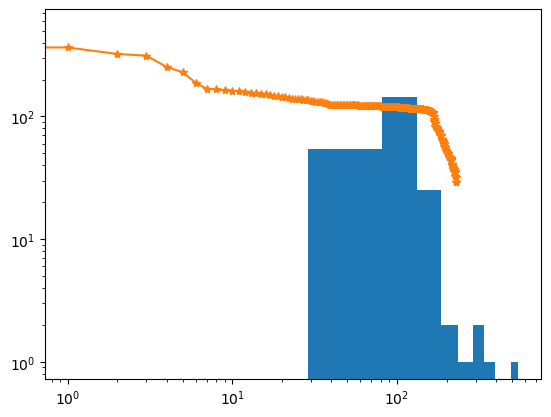

opiates 0.7991266375545851
OpiatesRecovery 0.7685589519650655
Drugs 0.7292576419213973
weed 0.6986899563318777
AskReddit 0.6986899563318777
legaladvice 0.6637554585152838
gaming 0.6637554585152838
cats 0.6550218340611353
DecidingToBeBetter 0.6506550218340611
offmychest 0.6462882096069869
iphone 0.6419213973799126
Instagram 0.6375545851528384
facebook 0.6331877729257641
mentalhealth 0.611353711790393
lgbt 0.611353711790393
self 0.6069868995633187
CleaningTips 0.6026200873362445
AMA 0.593886462882096
HelpMeFind 0.5807860262008734
women 0.5807860262008734
history 0.5764192139737991
REDDITORSINRECOVERY 0.5720524017467249
HairDye 0.5720524017467249
Advice 0.5676855895196506
confession 0.5676855895196506
AskWomen 0.5589519650655022
Showerthoughts 0.5589519650655022
couriersofreddit 0.5589519650655022
pestcontrol 0.5545851528384279
addiction 0.5502183406113537
sylvanianfamilies 0.5502183406113537
TwoXChromosomes 0.5458515283842794
BritishTV 0.5458515283842794
WeirdThingsIDo 0.5458515283842794

In [47]:
G_O, opiates_degree, opiates_betweenness, opiates_closeness, opiates_eigenvector = get_centrality(opiates2, 97.8)
opiates_degree_df = get_degree(opiates_degree, G_O)

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [48]:
def get_closeness(dict):
    for node in sorted(dict, key=dict.get, reverse=True)[:10]:
        print(node, dict[node])
    
def get_betweenness(dict):
    for node in sorted(dict, key=dict.get, reverse=True)[:10]:
        print(node, dict[node])

def get_eigen(dict):
    for node in sorted(dict, key=dict.get, reverse=True)[:10]:
        print(node, dict[node])

In [49]:
get_closeness(cocaine_closeness)

cocaine 0.8087167070217918
Drugs 0.7877358490566038
Showerthoughts 0.7785547785547785
AskReddit 0.7695852534562212
depression 0.7695852534562212
unpopularopinion 0.7695852534562212
Anxiety 0.7643020594965675
memes 0.7625570776255708
Dreams 0.755656108597285
HelpMeFind 0.7522522522522522


In [50]:
get_betweenness(cocaine_betweenness)

cocaine 0.023765826534288454
Drugs 0.02046546279691643
depression 0.017700940577723808
AskReddit 0.017699448182375663
Showerthoughts 0.01686724771751764
memes 0.016199389061089687
unpopularopinion 0.013597375247608717
Anxiety 0.013488384742031977
Dreams 0.011897633681856827
confession 0.011053693092792373


In [51]:
get_eigen(cocaine_eigenvector)

unpopularopinion 0.07138665748370154
pokemongo 0.07118455320131592
findareddit 0.07111211865054744
Dreams 0.07086791581858368
confessions 0.0706977726388816
HelpMeFind 0.07044171954604547
sex 0.0698226542911574
SkincareAddicts 0.06981976291613702
ravens 0.06981097961892273
leangains 0.0694925236832332


---

OLD

In [53]:
# benzodiazepines
get_closeness(benzodiazepines_closeness)

benzodiazepines 0.8165548098434005
opiates 0.8039647577092511
Drugs 0.7986870897155361
cocaine 0.7986870897155361
benzorecovery 0.7917570498915402
weed 0.7866379310344828
pillhead 0.7849462365591398
LSD 0.7815845824411135
antidepressants 0.7815845824411135
AskReddit 0.7733050847457628


In [54]:
get_betweenness(benzodiazepines_betweenness)

benzodiazepines 0.014987456420356014
opiates 0.014678399455357939
Drugs 0.014025591962450254
weed 0.013031179586444161
benzorecovery 0.012943980735067523
cocaine 0.01245198056400119
LSD 0.012187635875892704
depression 0.01187886448368576
antidepressants 0.011602513350444684
AskReddit 0.011578439036506896


In [55]:
get_eigen(benzodiazepines_eigenvector)

benzodiazepines 0.08220435878060643
cocaine 0.08017593384506909
pillhead 0.07977080764279812
benzorecovery 0.07842379921501852
antidepressants 0.07826459970790717
researchchemicals 0.07822790010801133
opiates 0.07811841583391298
Drugs 0.07718851407133244
dxm 0.0763400079679233
LSD 0.0761891604472809


In [56]:
# LSD
get_closeness(LSD_closeness)

LSD 0.8208446866485014
shrooms 0.80548128342246
Psychonaut 0.7922419460881
DMT 0.7709532949456174
Psychedelics 0.7645939086294417
weed 0.7503113325031133
trees 0.7461300309597523
Acid 0.7224220623501199
trippy 0.6905444126074498
Drugs 0.6889651229273871


In [57]:
get_betweenness(LSD_betweenness)

LSD 0.03920982048324267
shrooms 0.03589840394279311
Psychonaut 0.03326210001715329
DMT 0.03017561353235539
Psychedelics 0.02825468911901036
weed 0.024785360385076775
trees 0.02450026268214853
Acid 0.021349261202226816
trippy 0.015178241692449537
Drugs 0.014399524149596079


In [58]:
get_eigen(LSD_eigenvector)

LSD 0.10985000410255819
shrooms 0.10838435776909588
Psychonaut 0.10658833873182809
DMT 0.1025538332358513
Psychedelics 0.10167646063769538
weed 0.09987446116738197
trees 0.09841867972935198
Acid 0.09303589510641404
trippy 0.08712781128047144
NitrousOxide 0.08368603492193509


In [59]:
get_betweenness(opiates_betweenness)

opiates 0.038923191990415724
OpiatesRecovery 0.033769787719320994
Drugs 0.0320025613985491
weed 0.025881196064248036
AskReddit 0.023370549723311984
gaming 0.020358815577947973
legaladvice 0.018605720150742022
DecidingToBeBetter 0.01575133529871259
mentalhealth 0.015180636758129355
cats 0.0146710220194482


In [60]:
get_closeness(opiates_closeness)

opiates 0.8327272727272728
OpiatesRecovery 0.8120567375886525
Drugs 0.7869415807560137
weed 0.7684563758389261
AskReddit 0.7684563758389261
legaladvice 0.7483660130718954
gaming 0.7483660130718954
cats 0.7435064935064936
DecidingToBeBetter 0.7411003236245954
offmychest 0.7387096774193549


In [61]:
get_eigen(opiates_eigenvector)

opiates 0.08845039227087206
women 0.08819616643191341
OpiatesRecovery 0.08698591186660375
HairDye 0.08681561418566841
confession 0.0861321729016053
DecidingToBeBetter 0.08579353605031544
couriersofreddit 0.08474843206931679
AskReddit 0.08457493297852116
offmychest 0.0844848389591398
facebook 0.08414448678754255


---

Community Detection

In [66]:
# run louvains community detection algorithm
# assign community to each node dataframe

import community

def get_communities(G, df):
    partition = community.best_partition(G)
    print("number of communities: ", len(set(partition.values())))
    # add partition to df
    df["community"] = df["index"].map(partition)
    return df


In [68]:
LSD_comm = get_communities(G_L, LSD_degree_df)
benzodiazepines_comm = get_communities(G_B, benzodiazepines_degree_df)
cocaine_comm = get_communities(G_C, cocaine_degree_df)
opiates_comm = get_communities(G_O, opiates_degree_df)

number of communities:  7
number of communities:  2
number of communities:  2
number of communities:  2


In [89]:
# export nodes to JSON to pull descriptions from API
# benzodiazepines_degree_df["index"].to_json("data/benzodiazepines_nodes.json", orient="records")
# cocaine_degree_df["index"].to_json("data/cocaine_nodes.json", orient="records")
# LSD_degree_df["index"].to_json("data/LSD_nodes.json", orient="records")
# opiates_degree_df["index"].to_json("data/opiates_nodes.json", orient="records")

In [90]:
# combine unique nodes from all drugs
# nodes = pd.concat([benzodiazepines_degree_df["index"], cocaine_degree_df["index"], LSD_degree_df["index"], opiates_degree_df["index"]])
# nodes = nodes.drop_duplicates()
# nodes.to_json("data/nodes.json", orient="records")

In [70]:
# read in descriptions of the communities
desc_path = '/Users/laylabouzoubaa/Library/CloudStorage/GoogleDrive-layla.bzb@gmail.com/Other computers/MacBook Pro/Drexel/spring_22/INFO816/qual-project/analyses/all_about_desc_combined.xlsx'
desc = pd.read_excel(desc_path, sheet_name="round1_codes")

In [75]:
# join nodes to descriptions
def join_desc(df):
    desc["sub"] = desc["subr"].str.split("r/", expand=True)[1]
    # join
    df = df.merge(desc[["sub", "val"]], left_on="index", right_on="sub")
    return df

In [77]:
LSD_comm = join_desc(LSD_comm)
benzodiazepines_comm = join_desc(benzodiazepines_comm)
cocaine_comm = join_desc(cocaine_comm)
opiates_comm = join_desc(opiates_comm)

---

Topic modeling on descriptions

In [87]:
# NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
# stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
# simple preprocessing
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def get_topics(df):
    for community in df["community"].unique():
        print("community: ", community)
        # get descriptions
        descs = df[df["community"] == community]["val"].tolist()
        # drop NaNs
        descs = [desc for desc in descs if str(desc) != 'nan']
        descs = [preprocess(desc) for desc in descs]
        # vectorize
        vectorizer = TfidfVectorizer(stop_words=stop_words)
        X = vectorizer.fit_transform(descs)
        # get topics
        nmf = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(X)
        for topic_idx, topic in enumerate(nmf.components_):
            print("Topic #%d:" % topic_idx)
            print(" ".join([vectorizer.get_feature_names()[i]
                            for i in topic.argsort()[:-10 - 1:-1]]))
        print(" ")

In [88]:
# x = LSD_comm[LSD_comm["community"] == 1]["val"].tolist()
# x = [desc for desc in x if str(desc) != "nan"]
# x = [preprocess(desc) for desc in x]
get_topics(LSD_comm)

community:  1
Topic #0:
read rules please sourcing posting community includes bark dmt dimethyltryptamine
Topic #1:
growing hunting mushrooms consuming species psilocybin primarily containing magical fungi
Topic #2:
feel free kratom welcome unrestricted back post sub advocacy hints
Topic #3:
psychedelic substances serious casual discussion every experiments experiences experience existence
Topic #4:
xtc reduction safe harm mdma dedicated use subreddit dmt environments
 
community:  2
Topic #0:
dissociative dxm powerful cough official culture suppressant dextromethorphan welcome subreddit
Topic #1:
post good place food high memoir pipe perfect minimum methamphetamine
Topic #2:
helping kick habit group dedicated people find first food foremost
Topic #3:
psychoactive chemicals synthetic novel nps research strictly substances sourcing discussion
Topic #4:
adam trip guides reports comments videos harm reduction welcome found
 
community:  5
Topic #0:
questions personal drug ask get research

ValueError: init = 'nndsvd' can only be used when n_components <= min(n_samples, n_features)

In [ ]:
from pmaw import PushshiftAPI

start_epoch=int(dt.datetime(2022, 1, 1).timestamp())
end_epoch=int(dt.datetime(2022, 12, 31).timestamp())

In [ ]:
# Initialize PushShift
api = PushshiftAPI(file_checkpoint = 10)
posts = api.search_submissions(after=start_epoch,
                            # before=end_epoch,
                            subreddit='trees',
                            limit=10, memsafe=True)
print(f'{len(posts)} posts retrieved from Pushshift')

Not all PushShift shards are active. Query results may be incomplete.


0 posts retrieved from Pushshift


In [ ]:
# get all responses
post_list = [post for post in posts]